In [1]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import gzip
import json
import pickle
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import contractions
import os

In [2]:
# nltk.data.path.append("/usr/share/nltk_data")
# nltk.download('wordnet')
# nltk.download('stopwords')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

Loading the dataset. 

In [ ]:
# def parse(path):
#     with open(path, 'r') as f:
#         for line in f:
#             yield json.loads(line)

# def getDF(path):
#     i = 0
#     df = {}
#     for d in parse(path):
#         df[i] = d
#         i += 1
#     return pd.DataFrame.from_dict(df, orient='index')

# #df = getDF('/kaggle/input/amazon-electronics-metadata/Electronics_5.json/Electronics_5.json')

In [25]:
df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image'],
      dtype='object')

In [ ]:
# with open("elecronic_data.pkl", 'wb') as f:
#     pickle.dump(df, f)

In [7]:
with open("/kaggle/input/amazon-review-electronics/elecronic_data.pkl", 'rb') as f:
    df = pickle.load(f)

In [8]:
df.shape

(6739590, 12)

In [ ]:
# df2 = getDF('/kaggle/input/amazon-electronics-metadata/meta_Electronics.json/meta_Electronics.json')

In [ ]:
# with open("metadata.pkl", 'wb') as f:
#     pickle.dump(df2, f)

In [9]:
with open("/kaggle/input/amazon-data/metadata.pkl", 'rb') as f:
    df2 = pickle.load(f)

In [10]:
df2.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Electronics, Camera &amp; Photo, Video Survei...",,[The following camera brands and models have b...,,Genuine Geovision 1 Channel 3rd Party NVR IP S...,[],,GeoVision,"[Genuine Geovision 1 Channel NVR IP Software, ...","[>#3,092 in Tools &amp; Home Improvement &gt; ...",[],Camera &amp; Photo,,"January 28, 2014",$65.00,0011300000,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Electronics, Camera &amp; Photo]",,[This second edition of the Handbook of Astron...,,"Books ""Handbook of Astronomical Image Processi...",[0999470906],,33 Books Co.,[Detailed chapters cover these fundamental top...,"[>#55,933 in Camera &amp; Photo (See Top 100 i...","[0943396670, 1138055360, 0999470906]",Camera &amp; Photo,,"June 17, 2003",,0043396828,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Electronics, eBook Readers &amp; Accessories,...",,[A zesty tale. (Publishers Weekly)<br /><br />...,,One Hot Summer,"[0425167798, 039914157X]",,Visit Amazon's Carolina Garcia Aguilera Page,[],"3,105,177 in Books (",[],Books,,,$11.49,0060009810,[],[],NaN
3,"[Electronics, eBook Readers & Accessories, eBo...",,[],,Hurray for Hattie Rabbit: Story and pictures (...,"[0060219521, 0060219580, 0060219394]",,Visit Amazon's Dick Gackenbach Page,[],"2,024,298 in Books (","[0060219521, 0060219475, 0060219394]",Books,,,.a-section.a-spacing-mini{margin-bottom:6px!im...,0060219602,[],[],NaN
4,"[Electronics, eBook Readers & Accessories, eBo...",,[&#8220;sex.lies.murder.fame. is brillllli&#82...,,sex.lies.murder.fame.: A Novel,[],,Visit Amazon's Lolita Files Page,[],"3,778,828 in Books (",[],Books,,,$13.95,0060786817,[],[],NaN


Product - Headphone | Tasks performed over this product

### Pre-Processing

In [11]:
# Step 1: Filter the DataFrame for the product 'Headphones'
keyword = 'Headphone'
filtered_df = df2[df2['title'].str.contains(keyword, case=False)]

#filtered_df.to_csv('headphone_data.csv', index=False, escapechar='\\')

# Read the CSV file back into a DataFrame
filtered_df = pd.read_csv('/kaggle/input/helper-files/headphone_data.csv')

# # Step 2: Handle missing values 
filtered_df.fillna('Unknown', inplace=True)

# Remove duplicates 
filtered_df.drop_duplicates(inplace=True)

# Step 3: Report the total number of rows
total_rows = len(filtered_df)
print(f"Total number of rows for the product '{keyword}': {total_rows}")

Total number of rows for the product 'Headphone': 26865


In [12]:
merged_df = pd.merge(df, filtered_df, on='asin', how='inner')

### Descriptive Statistics

In [13]:
# Number of Reviews
num_reviews = merged_df.shape[0]

# Average Rating Score
avg_rating_score = merged_df['overall'].mean()

# Number of Unique Products
num_unique_products = merged_df['asin'].nunique()

# Number of Good Ratings
num_good_ratings = merged_df[merged_df['overall'] >= 3].shape[0]

# Number of Bad Ratings
num_bad_ratings = merged_df[merged_df['overall'] < 3].shape[0]

# Number of Reviews corresponding to each Rating
rating_counts = merged_df['overall'].value_counts().sort_index()

In [14]:
print("Descriptive Statistics:")
print(f"a. Number of Reviews: {num_reviews}")
print(f"b. Average Rating Score: {avg_rating_score:.2f}")
print(f"c. Number of Unique Products: {num_unique_products}")
print(f"d. Number of Good Ratings: {num_good_ratings}")
print(f"e. Number of Bad Ratings: {num_bad_ratings}")
print("f. Number of Reviews corresponding to each Rating:")
print(rating_counts)

Descriptive Statistics:
a. Number of Reviews: 411201
b. Average Rating Score: 4.11
c. Number of Unique Products: 8064
d. Number of Good Ratings: 353401
e. Number of Bad Ratings: 57800
f. Number of Reviews corresponding to each Rating:
overall
1.0     31009
2.0     26791
3.0     40760
4.0     79153
5.0    233488
Name: count, dtype: int64


In [15]:
merged_df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5.0,NaN,True,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,Great headphones. It's just the cord is too sh...,Five Stars,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
1,5.0,NaN,True,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,Really like these headphone. Wanted something...,Officewear,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
2,1.0,NaN,True,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,Wire to headphone broke off in less than a mon...,For the money they are fine. Just hope they ho...,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
3,3.0,NaN,True,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,Very good,Three Stars,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
4,1.0,NaN,True,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,Currently returning this product because the s...,Currently returning this product because the s...,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",Unknown,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411196,5.0,NaN,True,"05 4, 2018",A3E7OV7IR941JI,B01HI7D4VY,NaN,JC,I used these for tail light replacement bulbs ...,Excellent LEDS,...,['Super Sound Quality and Ergonomic Design: Wi...,"['>#1,208 in Cell Phones & Accessories (See To...",[],All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","November 29, 2018",$1.86,[],[],{}
411197,3.0,NaN,True,"03 14, 2018",A26I2RPRWOGD2V,B01HI7D4VY,NaN,Ray,Not the brightest bulb on the block.,Not the brightest bulb on the block.,...,['Super Sound Quality and Ergonomic Design: Wi...,"['>#1,208 in Cell Phones & Accessories (See To...",[],All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","November 29, 2018",$1.86,[],[],{}
411198,4.0,NaN,True,"09 22, 2018",A3VA3VK4PO1JD,B01HJ8E11E,{'Color:': ' White'},CD,I have only used these for 1 week at the time ...,They work...,...,"['With Bluetooth V4.1, advanced apt-X technolo...","['>#186,311 in Cell Phones & Accessories (See ...","['B01I0U77O8', 'B010RQWSE2', 'B00PGJWYJ0', 'B0...",All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","June 25, 2016",$9.91,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.co

### Preprocess the Text

In [16]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Function to remove accented characters from text
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# Function to expand contractions in text
def expand_contractions(text):
    return contractions.fix(text)

# Function to remove special characters from text
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Function for lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Function to apply text normalization
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert text to lowercase
        text = remove_html_tags(text)  # Remove HTML tags
        text = remove_accented_chars(text)  # Remove accented characters
        text = expand_contractions(text)  # Expand contractions
        text = remove_special_characters(text)  # Remove special characters
        text = lemmatize_text(text)  # Lemmatization
        return text
    else:
        return np.nan

# Apply text preprocessing to text columns
text_columns = ['reviewText', 'summary']  # Specify the text columns
for column in text_columns:
    merged_df[column] = merged_df[column].apply(normalize_text)

# Display the preprocessed DataFrame
print(merged_df)


        overall vote  verified   reviewTime      reviewerID        asin  \
0           5.0  NaN      True  02 22, 2015  A38RQFVQ1AKJQQ  4126895493   
1           5.0  NaN      True   05 8, 2017  A299MRB9O6GWDE  4126895493   
2           1.0  NaN      True   11 5, 2016  A3ACFC6DQQLIQT  4126895493   
3           3.0  NaN      True  09 24, 2016  A36BC0YFDBNB5X  4126895493   
4           1.0  NaN      True  07 17, 2016  A212PQ0HQPNNWM  4126895493   
...         ...  ...       ...          ...             ...         ...   
411196      5.0  NaN      True   05 4, 2018  A3E7OV7IR941JI  B01HI7D4VY   
411197      3.0  NaN      True  03 14, 2018  A26I2RPRWOGD2V  B01HI7D4VY   
411198      4.0  NaN      True  09 22, 2018   A3VA3VK4PO1JD  B01HJ8E11E   
411199      3.0  NaN      True  09 12, 2018  A11TVS6FKXS80H  B01HJ8E11E   
411200      4.0  NaN     False  08 18, 2018  A3VM9K4M0RQZRQ  B01HJ8E11E   

                                  style         reviewerName  \
0             {'Color:': ' Blue W/M

### Relevant Statistics

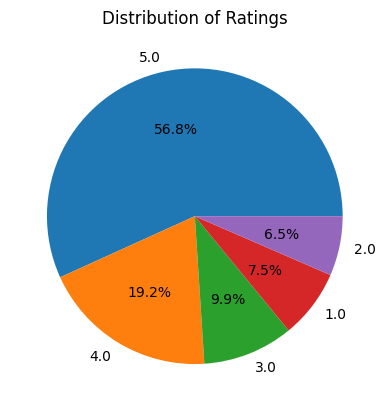

Top 20 Most Reviewed Brands:
brand
Sony              28512
Sennheiser        19239
Bose              10027
JVC                7187
Audio-Technica     6670
Etre Jeune         5895
Mpow               5566
Panasonic          5356
iNassen            5354
Philips            5322
Bluedio            5315
EldHus             5055
Koss               4633
MEE audio          4486
Symphonized        4285
XBRN               4245
TaoTronics         4082
V-MODA             4079
Beats              3916
Plantronics        3620
Name: count, dtype: int64

Top 20 Least Reviewed Brands:
brand
Rockford Fosgate           5
ESTAVEL                    5
Iseason                    5
California Cable Market    5
Viotek                     5
ATEX                       5
DESHENG                    5
Unpluggify                 5
LAFEINA                    5
Komingo                    5
Targus                     5
AWMCY                      5
Tt eSPORTS                 5
APG                        5
Oduo            

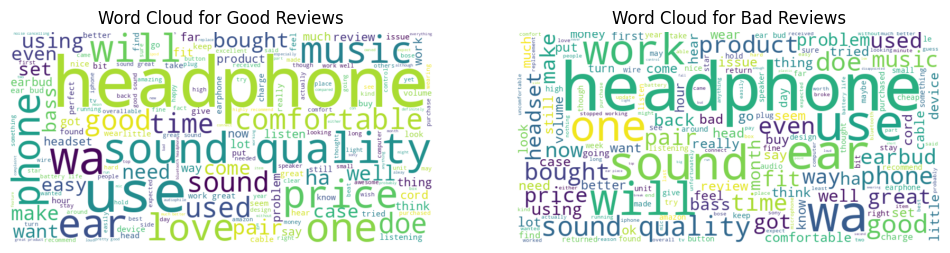

In [17]:
# Top 20 most reviewed brands
top_20_most_reviewed_brands = merged_df['brand'].value_counts().head(20)

# Top 20 least reviewed brands
top_20_least_reviewed_brands = merged_df['brand'].value_counts().tail(20)

# Most positively reviewed 'Headphone' (if available)
headphone_data = merged_df[merged_df['category'].str.contains('Headphone', case=False, na=False)]
# Group by 'asin' and calculate the mean of 'overall' ratings
average_ratings = headphone_data.groupby('asin')['overall'].mean()
# Find the 'asin' with the highest average rating
most_positively_reviewed_asin = average_ratings.idxmax()
filtered_data = merged_df[merged_df['asin'] == most_positively_reviewed_asin]
result = filtered_data.iloc[0]
result = result[['title', 'brand']]

# Count of ratings over 5 consecutive years
merged_df['year'] = pd.to_datetime(merged_df['reviewTime']).dt.year
ratings_over_5_years = merged_df.groupby('year')['overall'].count().tail(5)

# Word Cloud for 'Good' and 'Bad' ratings
good_reviews = merged_df[merged_df['overall'] > 3]['reviewText'].str.cat(sep=' ')
bad_reviews = merged_df[merged_df['overall'] <= 3]['reviewText'].str.cat(sep=' ')

good_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(good_reviews)
bad_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bad_reviews)

# Pie chart for Distribution of Ratings vs. No. of Reviews
rating_distribution = merged_df['overall'].value_counts()
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

# Year with maximum reviews
year_with_max_reviews = merged_df['year'].value_counts().idxmax()

# Year with the highest number of customers
year_with_highest_customers = merged_df.groupby('year')['reviewerID'].nunique().idxmax()

# Displaying the results
print("Top 20 Most Reviewed Brands:")
print(top_20_most_reviewed_brands)
print("\nTop 20 Least Reviewed Brands:")
print(top_20_least_reviewed_brands)
print("\nMost Positively Reviewed Headphone:")
print("Title: " + result['title'])
print("Brand: " + result['brand'])
print("\nCount of Ratings Over 5 Consecutive Years:")
print(ratings_over_5_years)
print("\nYear with Maximum Reviews:", year_with_max_reviews)
print("\nYear with the Highest Number of Customers:", year_with_highest_customers)

# Displaying word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Good Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Bad Reviews')
plt.axis('off')
plt.show()

In [18]:
merged_df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image', 'category', 'tech1', 'description', 'fit', 'title', 'also_buy',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat',
       'similar_item', 'date', 'price', 'imageURL', 'imageURLHighRes',
       'details', 'year'],
      dtype='object')

In [18]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# import numpy as np

# # Convert ratings into categories
# def label_rating_class(rating):
#     if rating > 3:
#         return 'Good'
#     elif rating == 3:
#         return 'Average'
#     else:
#         return 'Bad'

# # Apply label_rating_class function to create the target variable
# merged_df['rating_class'] = merged_df['overall'].apply(label_rating_class)

# # Drop rows with missing values in the 'reviewText' column
# merged_df.dropna(subset=['reviewText'], inplace=True)

# # Split the data into features (X) and target variable (y)
# X = merged_df['reviewText']
# y = merged_df['rating_class']

# # Split the data into training and testing sets (75:25 ratio)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Initialize TfidfVectorizer with desired parameters
# vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# # Fit and transform the training data
# X_train_tfidf = vectorizer.fit_transform(X_train)

# # Transform the testing data using the same vectorizer fitted with the training data
# X_test_tfidf = vectorizer.transform(X_test)

# # Check the shapes of the transformed data
# print("Training data shape after TF-IDF transformation:", X_train_tfidf.shape)
# print("Testing data shape after TF-IDF transformation:", X_test_tfidf.shape)

# # Check the shapes of the training and testing sets
# print("Training data shape:", X_train.shape, y_train.shape)
# print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape after TF-IDF transformation: (308360, 5000)
Testing data shape after TF-IDF transformation: (102787, 5000)
Training data shape: (308360,) (308360,)
Testing data shape: (102787,) (102787,)


### Feature engineering Technique

In [19]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import numpy as np

# Convert ratings into categories
def label_rating_class(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

# Apply label_rating_class function to create the target variable
merged_df['rating_class'] = merged_df['overall'].apply(label_rating_class)

# Drop rows with missing values in the 'reviewText' column
merged_df.dropna(subset=['reviewText'], inplace=True)

# Split the data into features (X) and target variable (y)
X = merged_df['reviewText']
y = merged_df['rating_class']

# Split the data into training and testing sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Tokenize the text data
X_train_tokens = [text.split() for text in X_train]
X_test_tokens = [text.split() for text in X_test]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Transform the training data using Word2Vec embeddings
X_train_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_train_tokens])

# Transform the testing data using Word2Vec embeddings
X_test_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_test_tokens])

# Check the shapes of the transformed data
print("Training data shape after Word2Vec transformation:", X_train_word2vec.shape)
print("Testing data shape after Word2Vec transformation:", X_test_word2vec.shape)

# Check the shapes of the training and testing sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape after Word2Vec transformation: (308360, 100)
Testing data shape after Word2Vec transformation: (102787, 100)
Training data shape: (308360,) (308360,)
Testing data shape: (102787,) (102787,)


### Evaluation Metrics

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# Train multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(), max_iter=1000)
}

# Loop over each model
for name, model in models.items():
    print(f"Model: {name}")
    # Train the model
    model.fit(X_train_word2vec, y_train)
    # Make predictions
    y_pred = model.predict(X_test_word2vec)
    # Print classification report
    print(classification_report(y_test, y_pred))


Model: Logistic Regression


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

     Average       0.36      0.06      0.10     10256
         Bad       0.66      0.47      0.55     14438
        Good       0.83      0.97      0.90     78093

    accuracy                           0.81    102787
   macro avg       0.62      0.50      0.52    102787
weighted avg       0.76      0.81      0.77    102787

Model: KNN
              precision    recall  f1-score   support

     Average       0.25      0.15      0.19     10256
         Bad       0.57      0.40      0.47     14438
        Good       0.84      0.93      0.88     78093

    accuracy                           0.78    102787
   macro avg       0.55      0.49      0.51    102787
weighted avg       0.74      0.78      0.76    102787

Model: Decision Tree
              precision    recall  f1-score   support

     Average       0.22      0.24      0.23     10256
         Bad       0.41      0.42      0.41     14438
        Good       0.85      0.83      0.84

# Collaborative Filtering

### Trial 1 : Chunking Method 

In [19]:
# # df.to_csv('original.csv', index=False, escapechar='\\')
# # df = pd.read_csv('original.csv')

# # # Step 2: Handle missing values 
# df.fillna('Unknown', inplace=True)

# # Remove duplicates 
# df.drop_duplicates(inplace=True)

# # Define chunk size
# chunk_size = 10000

# # Split the DataFrame into chunks
# chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

# # Iterate over the chunks
# for i, chunk in enumerate(chunks):
#     # Store each chunk in a pickle file
#     with open(f"chunk_{i}.pkl", "wb") as f:
#         pickle.dump(chunk, f)
        
# # Path to the directory containing the pickle files
# directory_path = '/kaggle/working/'

# # Initialize an empty DataFrame to store the user-item rating matrix
# user_item_matrix = pd.DataFrame()

# # Iterate over each file in the directory
# for filename in os.listdir(directory_path):
#     if filename.endswith('.pkl'):  # Check if the file is a pickle file
#         file_path = os.path.join(directory_path, filename)
#         # Load the chunk from the pickle file
#         with open(file_path, "rb") as f:
#             chunk = pickle.load(f)
#         # Pivot the chunk to create a user-item rating matrix for the current chunk
#         chunk_matrix = chunk.pivot(index='asin', columns='reviewerID', values='overall')
#         # Merge the chunk matrix with the existing user-item rating matrix
#         user_item_matrix = pd.concat([user_item_matrix, chunk_matrix], axis=1, sort=False)

# # Display the user-item rating matrix
# print(user_item_matrix)

### Trial 2 : k-Fold Method

In [5]:
import pandas as pd
from sklearn.model_selection import KFold
import torch

In [6]:
# Define the number of folds (K)
k = 25

# Initialize the KFold splitter
# kf = KFold(n_splits=k, shuffle=True, random_state=42)
kf = KFold(n_splits=k, shuffle=False)

# Initialize a dictionary to store train and val sets for each fold
fold_data = {}

# Iterate over the splits
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(df)):
    print(f"Fold {fold_idx + 1}:")
    
    # Get the training and validation sets for this fold
    train_set = df.iloc[train_idx]
    val_set = df.iloc[val_idx]

    # Store train and val sets in the dictionary
    fold_data[fold_idx + 1] = {'train': train_set, 'val': val_set}

Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Fold 6:
Fold 7:
Fold 8:
Fold 9:
Fold 10:
Fold 11:
Fold 12:
Fold 13:
Fold 14:
Fold 15:
Fold 16:
Fold 17:
Fold 18:
Fold 19:
Fold 20:
Fold 21:
Fold 22:
Fold 23:
Fold 24:
Fold 25:


In [5]:
fold_data[1]['val']

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3.0,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5.0,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5.0,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3.0,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
269579,4.0,8,False,"12 5, 2004",AOEQZLCRMEYXL,B0002JUH3O,{'Product Packaging:': ' Standard Packaging'},Leon Rosiczkowski,I had my doubts about my wife's brand new QUES...,Worth Buying!,1102204800,NaN
269580,5.0,4,False,"12 1, 2004",A1E17V8U6MJXJ,B0002JUH3O,{'Product Packaging:': ' Standard Packaging'},Kermit,Simply the coolest device for the direction ch...,Bravo!,1101859200,NaN
269581,5.0,19,False,"11 24, 2004",AI64A73L6EHP3,B0002JUH3O,{'Product Packaging:': ' Standard Packaging'},Mr. GPS,I have owned a Quest for a couple of weeks and...,Works perfectly,1101254400,NaN
269582,2.0,11,False,"11 22, 2004",A24LTRDKJAR5JM,B0002JUH3O,{'Product Packaging:': ' Standard Packaging'},FJR13T,"Yes, this device is too good to be true\n\nI r...",Too good to be true,1101081600,NaN


In [6]:
train_set = fold_data[1]['train']
val_set = fold_data[1]['val']

users, products = val_set["reviewerID"].unique(), val_set["asin"].unique()
users, products = sorted(users), sorted(products)

# Reverse Mapping
usr_idx, prod_idx = dict(), dict()
for idx, usr in enumerate(users): usr_idx[usr] = idx
for idx, prod in enumerate(products): prod_idx[prod] = idx

h, w = len(users), len(products)

# Create a user-item rating matrix
rating_matrix = torch.zeros((h, w), dtype=torch.float16)

# Filling data
for row_idx, row in val_set.iterrows():
    usr, prod = row["reviewerID"], row["asin"]
    rating = row["overall"]
    y, x = usr_idx[usr], prod_idx[prod]
    rating_matrix[y][x] = rating

In [ ]:
# import numpy as np

# # Function to calculate cosine similarity
# def cosine_similarity(vec1, vec2):
#     dot_product = np.dot(vec1, vec2)
#     norm_vec1 = np.linalg.norm(vec1)
#     norm_vec2 = np.linalg.norm(vec2)
#     similarity = dot_product / (norm_vec1 * norm_vec2)
#     return similarity

# # Calculate similarity matrix
# def calculate_similarity_matrix(rating_matrix):
#     num_users = rating_matrix.shape[0]
#     similarity_matrix = np.zeros((num_users, num_users))
    
#     for i in range(num_users):
#         for j in range(num_users):
#             similarity_matrix[i, j] = cosine_similarity(rating_matrix[i], rating_matrix[j])
    
#     return similarity_matrix

# # Calculate similarity matrix
# similarity_matrix = calculate_similarity_matrix(rating_matrix)

# # # Print similarity matrix
# # print("Similarity matrix:")
# # print(similarity_matrix)

In [9]:
import scipy.sparse
from sklearn.metrics.pairwise import cosine_similarity

# Convert rating_matrix to sparse matrix format
sparse_rating_matrix = scipy.sparse.csr_matrix(rating_matrix)

# Calculate cosine similarity using sparse matrix representation
similarity_matrix = cosine_similarity(sparse_rating_matrix, dense_output=False)


In [12]:
# Initialize dictionaries to store user and product indices
usr_idx = {}
prod_idx = {}

# Populate user and product indices dictionaries
for idx, usr in enumerate(users):
    usr_idx[usr] = idx

for idx, prod in enumerate(products):
    prod_idx[prod] = idx

# Initialize a list to store absolute differences
absolute_diffs = []

# Iterate over each user-item pair in the validation set
for _, row in val_set.iterrows():
    usr, prod, actual_rating = row['reviewerID'], row['asin'], row['overall']
    
    # Check if the user and product are in the user-item rating matrix
    if usr in usr_idx and prod in prod_idx:
        usr_idx_val = usr_idx[usr]
        prod_idx_val = prod_idx[prod]
        predicted_rating = rating_matrix[usr_idx_val, prod_idx_val]
        absolute_diff = abs(predicted_rating - actual_rating)
        absolute_diffs.append(absolute_diff)

# Calculate the Mean Absolute Error (MAE)
mae = np.mean(absolute_diffs)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.001784


In [ ]:
import numpy as np

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

# Function to calculate the similarity matrix
def calculate_similarity_matrix(rating_matrix):
    num_users = rating_matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))
    
    for i in range(num_users):
        for j in range(num_users):
            similarity_matrix[i, j] = cosine_similarity(rating_matrix[i], rating_matrix[j])
    
    return similarity_matrix

# Function to predict ratings using nearest neighbors
def predict_rating(rating_matrix, similarity_matrix, usr_idx, prod_idx, k=10):
    num_users = rating_matrix.shape[0]
    predicted_ratings = np.zeros(num_users)
    
    for i in range(num_users):
        # Get indices of top k similar users
        sim_users_indices = np.argsort(similarity_matrix[i])[::-1][:k]
        
        # Compute weighted average of ratings from similar users
        total_similarity = 0
        weighted_sum = 0
        for j in sim_users_indices:
            if rating_matrix[j, prod_idx] != 0:  # Only consider if user j has rated the product
                sim = similarity_matrix[i, j]
                total_similarity += sim
                weighted_sum += sim * rating_matrix[j, prod_idx]
        
        if total_similarity != 0:
            predicted_ratings[i] = weighted_sum / total_similarity
    
    return predicted_ratings

# Function to calculate MAE
def calculate_mae(predicted_ratings, actual_ratings):
    absolute_diffs = np.abs(predicted_ratings - actual_ratings)
    mae = np.mean(absolute_diffs)
    return mae

# Initialize list to store MAE values for different k values
mae_values = []

# Iterate over different values of k (number of neighbors)
for k in [20, 30, 40, 50]:
    # Calculate similarity matrix
    similarity_matrix = calculate_similarity_matrix(rating_matrix)
    
    # Predict ratings for validation set
    predicted_ratings = []
    for _, row in val_set.iterrows():
        usr, prod, actual_rating = row['reviewerID'], row['asin'], row['overall']
        usr_idx_val = usr_idx.get(usr, None)
        prod_idx_val = prod_idx.get(prod, None)
        if usr_idx_val is not None and prod_idx_val is not None:
            predicted_rating = predict_rating(rating_matrix, similarity_matrix, usr_idx_val, prod_idx_val, k=k)
            predicted_ratings.append(predicted_rating)
    
    # Calculate MAE
    predicted_ratings = np.array(predicted_ratings)
    actual_ratings = val_set['overall'].values
    mae = calculate_mae(predicted_ratings, actual_ratings)
    mae_values.append((k, mae))

# Print MAE values for different values of k
for k, mae in mae_values:
    print(f"MAE for {k} nearest neighbors:", mae)

### Trail 3 : k-Fold Method over Merged_df (Sampled Dataset)

In [11]:
# # Initialize an empty dictionary to store reviewer-product ratings
# reviewer_product_ratings = {}

# # Iterate over each row in the DataFrame
# for index, row in merged_df.iterrows():
#     reviewer_id = row['reviewerID']
#     product_id = row['asin']
#     rating = row['overall']
    
#     # Check if reviewer_id already exists in the dictionary
#     if reviewer_id in reviewer_product_ratings:
#         # If yes, update the ratings for the corresponding product
#         reviewer_product_ratings[reviewer_id][product_id] = rating
#     else:
#         # If not, create a new entry for the reviewer and their ratings
#         reviewer_product_ratings[reviewer_id] = {product_id: rating}

In [ ]:
# # Get unique reviewer IDs and product IDs
# reviewer_ids = sorted(list(reviewer_product_ratings.keys()))
# product_ids = sorted(set(product_id for ratings in reviewer_product_ratings.values() for product_id in ratings.keys()))

# # Create a user-item rating matrix filled with NaNs
# num_reviewers = len(reviewer_ids)
# num_products = len(product_ids)
# rating_matrix = np.empty((num_reviewers, num_products))
# rating_matrix[:] = np.nan

# # Populate the rating matrix with ratings from the dictionary
# for i, reviewer_id in enumerate(reviewer_ids):
#     ratings = reviewer_product_ratings[reviewer_id]
#     for j, product_id in enumerate(product_ids):
#         if product_id in ratings:
#             rating_matrix[i, j] = ratings[product_id]

# # # Display the rating matrix
# # print("User-Item Rating Matrix:")
# # print(rating_matrix)

In [11]:
# Display the first few entries of the dictionary
for reviewer_id, product_ratings in list(reviewer_product_ratings.items())[:5]:
    print(reviewer_id, ":", product_ratings)

A38RQFVQ1AKJQQ : {'4126895493': 5.0}
A299MRB9O6GWDE : {'4126895493': 5.0, 'B00X6OV056': 5.0}
A3ACFC6DQQLIQT : {'4126895493': 1.0, 'B018RP7X0O': 5.0}
A36BC0YFDBNB5X : {'4126895493': 3.0, 'B00IUH1TV4': 3.0, 'B0177QNIVM': 5.0, 'B019FFJB3M': 1.0}
A212PQ0HQPNNWM : {'4126895493': 1.0, 'B00X6OV056': 1.0}


In [7]:
import pandas as pd
from sklearn.model_selection import KFold

# Define the number of folds (K)
k = 5

# Initialize the KFold splitter
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Iterate over the splits
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(merged_df)):
    print(f"Fold {fold_idx + 1}:")
    
    # Get the training and validation sets for this fold
    train_set = merged_df.iloc[train_idx]
    val_set = merged_df.iloc[val_idx]
    
    # Perform further operations with the train_set and val_set as needed

Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:


In [ ]:
# Initialize an empty dictionary to store user-item ratings
user_item_ratings = {}

# Iterate over the rows in the training set
for _, row in train_set.iterrows():
    reviewerID = row['reviewerID']
    asin = row['asin']
    overall = row['overall']
    
    # If the reviewerID is not in the dictionary, create a new entry
    if reviewerID not in user_item_ratings:
        user_item_ratings[reviewerID] = {}
    
    # Store the rating for the corresponding item
    user_item_ratings[reviewerID][asin] = overall

# Create a DataFrame from the dictionary
user_item_matrix = pd.DataFrame.from_dict(user_item_ratings, orient='index')

# Replace missing values with 0
user_item_matrix.fillna(0, inplace=True)

# Display the user-item rating matrix
print("User-Item Rating Matrix:")
print(user_item_matrix)


In [8]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Step 1: Define functions to calculate cosine similarity and k-nearest neighbors
def cosine_similarity_matrix(matrix):
    similarity = cosine_similarity(matrix)
    np.fill_diagonal(similarity, 0)  # Set diagonal elements to 0 to avoid self-similarity
    return similarity

def k_nearest_neighbors(similarity_matrix, k):
    return np.argsort(similarity_matrix)[:, ::-1][:, 1:k+1]

# Step 2: Define function to predict missing values using collaborative filtering
def predict_ratings(train_matrix, similarity_matrix, k):
    nn_matrix = k_nearest_neighbors(similarity_matrix, k)
    predicted_ratings = np.zeros_like(train_matrix)
    for i in range(train_matrix.shape[0]):
        for j in range(train_matrix.shape[1]):
            if train_matrix[i][j] == 0:  # Only predict for missing values
                nearest_neighbors = nn_matrix[i]
                nearest_similarities = similarity_matrix[i][nearest_neighbors]
                nearest_ratings = train_matrix[nearest_neighbors, j]
                predicted_ratings[i][j] = np.dot(nearest_similarities, nearest_ratings) / np.sum(nearest_similarities)
    return predicted_ratings

# Step 3: Define function to calculate MAE
def calculate_mae(actual_matrix, predicted_matrix):
    mask = actual_matrix != 0  # Exclude missing values
    return mean_absolute_error(actual_matrix[mask], predicted_matrix[mask])

# Step 4: Define function to perform k-fold cross-validation
def k_fold_validation(matrix, k_folds, k_neighbors):
    kf = KFold(n_splits=k_folds)
    mae_values = []
    for train_index, val_index in kf.split(matrix):
        train_matrix, val_matrix = matrix[train_index], matrix[val_index]
        similarity_matrix = cosine_similarity_matrix(train_matrix)
        predicted_ratings = predict_ratings(train_matrix, similarity_matrix, k_neighbors)
        mae = calculate_mae(val_matrix, predicted_ratings)
        mae_values.append(mae)
    return np.mean(mae_values)

In [9]:
# Step 5: Create user-item rating matrix from merged_df
users = merged_df['reviewerID'].unique()
items = merged_df['asin'].unique()
user_item_matrix = np.zeros((len(users), len(items)))

# Populate user-item matrix
for index, row in merged_df.iterrows():
    user_idx = np.where(users == row['reviewerID'])[0][0]
    item_idx = np.where(items == row['asin'])[0][0]
    user_item_matrix[user_idx][item_idx] = row['overall']

In [ ]:
# Step 6: Define k values
k_values = [10, 20, 30, 40, 50]

# Step 7: Perform collaborative filtering for each k value
for k in k_values:
    mae = k_fold_validation(user_item_matrix, 5, k)
    print(f"MAE for k={k}: {mae}")